In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date

In [6]:
CustomerDemographic = pd.read_excel('/content/drive/MyDrive/DA/Customer Segmentation Analysis/Raw_data.xlsx' , sheet_name='CustomerDemographic')
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [9]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

1. Dropping Irrelevent Columns

In [10]:
CustomerDemographic.drop(labels={'default'}, axis=1 , inplace=True)

2. Missing value check

In [11]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

2.1 last_name

In [12]:
CustomerDemographic['last_name'].fillna('None', inplace = True)

In [15]:
CustomerDemographic['last_name'].isnull().sum()

0

2.2 DOB (Date of Birth)

In [17]:
CustomerDemographic['DOB'].isnull().sum()

87

less than 5 % of data has null date of birth, so removing the records where date of birth is null.

In [19]:
dob_index_null = CustomerDemographic[CustomerDemographic['DOB'].isnull()].index
CustomerDemographic.drop(index=dob_index_null, inplace=True, axis=0)

In [20]:
CustomerDemographic['DOB'].isnull().sum()

0

In [21]:
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'])

import datetime
def age(born):
    today = 2017
    return today - born.year

CustomerDemographic['Age'] = CustomerDemographic.apply(lambda x: age(x.DOB), axis = 1)

In [22]:
CustomerDemographic['Age'].describe()

count    3913.000000
mean       39.969333
std        12.796387
min        15.000000
25%        30.000000
50%        40.000000
75%        49.000000
max       174.000000
Name: Age, dtype: float64

<ipython-input-24-0e584fba1bba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CustomerDemographic['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

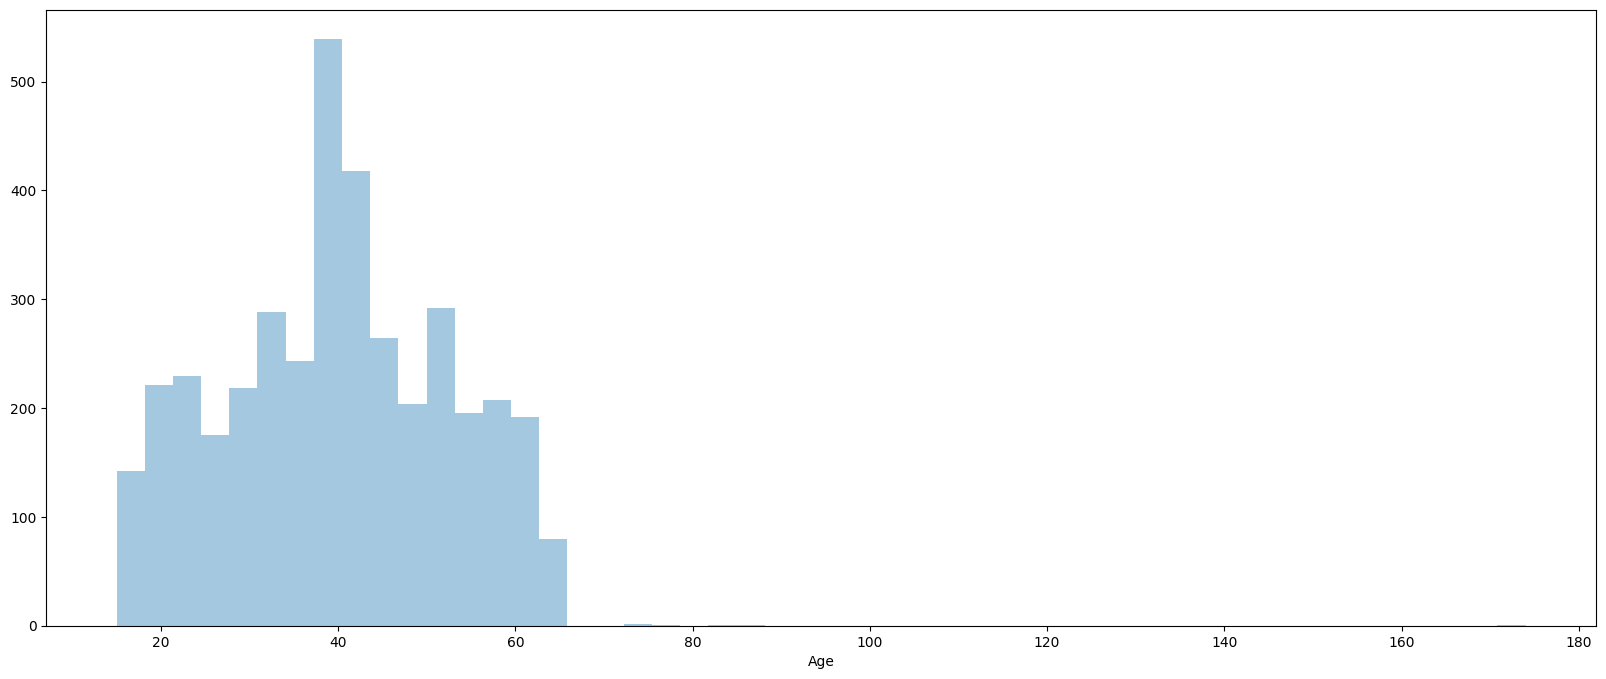

In [24]:
plt.figure(figsize=(20,8))
sns.distplot(CustomerDemographic['Age'], kde=False, bins=50)

2.3 job_title

In [26]:
CustomerDemographic['job_title'].fillna('Missing', inplace = True)

In [27]:
CustomerDemographic['job_title'].isnull().sum()

0

2.4 job_industry_category

In [28]:
CustomerDemographic['job_industry_category'].isnull().sum()

656

In [29]:
CustomerDemographic['job_industry_category'].fillna('Missing', inplace = True)

In [30]:
CustomerDemographic['job_industry_category'].head()

0                Health
1    Financial Services
2              Property
3                    IT
4               Missing
Name: job_industry_category, dtype: object

In [31]:
CustomerDemographic.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

there are no missing values

3. Inconsistency Check in Data

In [32]:
df_numeric = CustomerDemographic.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :", numeric_cols)

df_non_numeric = CustomerDemographic.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :", non_numeric_cols)

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure' 'Age']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car']


In [34]:
CustomerDemographic['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

Remove row whose gender is U

In [36]:
CustomerDemographic.drop(CustomerDemographic[CustomerDemographic['gender'] == 'U'].index, axis = 0, inplace = True)

In [41]:
def define_gender(gender):
  if gender == 'F':
    return 'Female'
  elif gender == 'M':
    return 'Male'
  elif gender == 'Femal':
    return 'Female'
  else:
    return gender

CustomerDemographic['gender'] = CustomerDemographic['gender'].apply(lambda x: define_gender(x))

In [43]:
CustomerDemographic['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

In [44]:
CustomerDemographic['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [45]:
CustomerDemographic['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

In [46]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

In [48]:
CustomerDemographic.drop('customer_id', axis=1).drop_duplicates(inplace = True)

In [50]:
CustomerDemographic.to_csv("/content/drive/MyDrive/DA/Customer Segmentation Analysis/CustomerDemographic.csv", index = False)